# Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

In [4]:
p_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/data.csv')

p_df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2682,DC,55,510,354-5058,yes,no,0,106.1,77,...,100,10.50,96.4,92,4.34,12.9,3,3.48,0,False
1,3304,IL,71,510,330-7137,yes,no,0,186.1,114,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
2,757,UT,112,415,358-5953,no,no,0,115.8,108,...,111,20.68,184.6,78,8.31,13.1,5,3.54,1,False
3,2402,NY,77,415,388-9285,no,yes,33,143.0,101,...,102,18.04,104.9,120,4.72,15.3,4,4.13,5,True
4,792,NV,69,510,397-6789,yes,yes,33,271.5,98,...,102,21.54,165.4,85,7.44,8.2,2,2.21,1,True


In [5]:
t_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

t_df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2360,IN,68,415,386-9724,no,no,0,222.1,107,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,600,MI,102,510,336-4656,no,no,0,102.6,89,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,1501,AZ,72,510,407-9830,no,no,0,272.4,88,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,1114,TN,108,408,352-1127,no,yes,15,165.1,85,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,517,OK,52,408,389-4780,no,no,0,214.7,68,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False


In [6]:
tr_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

tr_df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2360,IN,68,415,386-9724,no,no,0,222.1,107,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,600,MI,102,510,336-4656,no,no,0,102.6,89,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,1501,AZ,72,510,407-9830,no,no,0,272.4,88,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,1114,TN,108,408,352-1127,no,yes,15,165.1,85,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,517,OK,52,408,389-4780,no,no,0,214.7,68,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False


In [7]:
df = p_df.drop(columns=['Unnamed: 0'])

In [8]:
test_df = t_df.drop(columns=['Unnamed: 0'])

In [9]:
train_df = tr_df.drop(columns=['Unnamed: 0'])

In [11]:
X = train_df.drop(['churn'], axis = 1)
y = train_df['churn']


In [14]:
y.value_counts(normalize = True)

False    0.841317
True     0.158683
Name: churn, dtype: float64

- it will be hard to predict the true churn since 15% are churned so it is clear the data is imbalanced (which we did in data cleaning)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import set_config
set_config(display='diagram')

In [96]:
# numeric columns + drop phone #
X_tr_num = X_train.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)
X_tr_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
71,141,0,217.1,110,36.91,241.5,111,20.53,253.5,103,11.41,12.0,6,3.24,0
296,75,0,111.7,121,18.99,237.3,119,20.17,253.5,110,11.41,13.1,6,3.54,1
198,104,0,164.2,109,27.91,155.4,90,13.21,168.9,117,7.60,10.7,8,2.89,1
268,76,0,171.1,78,29.09,257.2,83,21.86,91.6,92,4.12,16.2,3,4.37,1
222,102,29,214.7,86,36.50,314.3,109,26.72,280.2,110,12.61,14.3,2,3.86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,73,26,131.2,98,22.30,106.5,97,9.05,221.7,96,9.98,10.2,6,2.75,2
90,148,0,148.2,138,25.19,159.6,123,13.57,197.4,62,8.88,8.6,3,2.32,2
10,75,0,224.7,116,38.20,192.0,79,16.32,212.2,98,9.55,11.3,11,3.05,3
111,75,0,147.5,110,25.08,191.7,97,16.29,135.0,68,6.08,16.4,3,4.43,2


In [132]:
# doing the same for X test
X_te_num = X_test.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)

In [107]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


steps = [('std_scaler', StandardScaler()), ("SMOTE", SMOTE()), ('lg', LogisticRegression())]
model_pipe = Pipeline(steps)

In [108]:
model_pipe

Pipeline(steps=[('std_scaler', StandardScaler()), ('SMOTE', SMOTE()),
                ('lg', LogisticRegression())])

In [111]:
model_pipe.fit(X_tr_num, y_train);

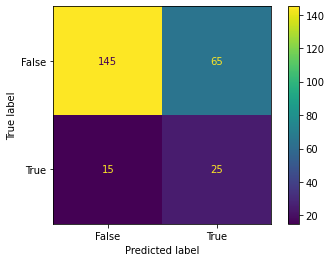

In [116]:
plot_confusion_matrix(model_pipe,X_tr_num,y_train)

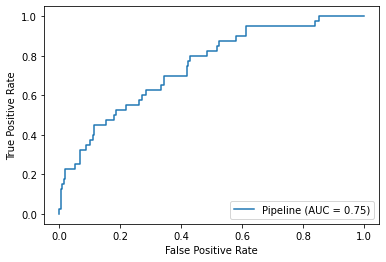

In [128]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_pipe,X_tr_num,y_train)

- if train is greater than test score overfitting

In [130]:
print(model_pipe.score(X_tr_num, y_train))

0.68


In [133]:
print(model_pipe.score(X_te_num, y_test))

0.7023809523809523
